In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import moment, mode

In [3]:
from matplotlib.lines import Line2D

In [4]:
import numpy as np

In [5]:
save_path = '/scratch0/ilya/locDownloads/wacv2020_fig/'
DATA_DIR = '/scratch0/ilya/locDownloads/temp/wacv_mh_data/'

In [6]:
# from plotnine import *

%matplotlib inline
# survs_df = pd.read_csv('surveys.csv').dropna()

In [7]:
plt.style.use('ggplot')
COLORS= [d['color'] for d in list(plt.rcParams['axes.prop_cycle'])]
COLORD = {
    'red': COLORS[0],
    'blue': COLORS[1],
    'purple': COLORS[2],
    'gray': COLORS[3],
    'yellow': COLORS[4],
    'green': COLORS[5],
    'pink': COLORS[6]
}

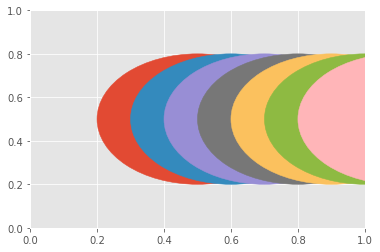

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1)
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    
    ax.add_patch(plt.Circle((0.5 + i/10.0,0.5), radius=0.3, color=color['color']))


In [551]:
res = 32
iperclass = '2.5k'
i64base_ifid = pd.read_csv(DATA_DIR + 'c100_baseline_150k_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
# i64base_ifid = pd.read_csv(DATA_DIR + 'I64acbase_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
i64expt_ifid = pd.read_csv(DATA_DIR + 'c100_kp1_150k_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()

In [539]:
res = 64
iperclass = '2.5k'
i64base_ifid = pd.read_csv(DATA_DIR + 'I64base_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
# i64base_ifid = pd.read_csv(DATA_DIR + 'I64acbase_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
i64expt_ifid = pd.read_csv(DATA_DIR + 'I64expt_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()

In [378]:
res = 128
iperclass = '2k'
# i64base_ifid = pd.read_csv(DATA_DIR + 'I128base_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
i64base_ifid = pd.read_csv(DATA_DIR + 'I128_baseline_1130k_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
i64expt_ifid = pd.read_csv(DATA_DIR + 'I128expt_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()
# i64expt_ifid = pd.read_csv(DATA_DIR + 'I128trial2_790k_ifid.txt', sep=",", header=None, names=["ifid"])["ifid"].to_numpy()

In [552]:
m = min(len(i64base_ifid), len(i64expt_ifid))
i64base_ifid = i64base_ifid[:m]
i64expt_ifid = i64expt_ifid[:m]
print('Looking at %i classes' % m)

Looking at 100 classes


In [553]:
# pchange = 100*(ifids['fid_new'] - ifids['fid_old']) / ifids['fid_old']
adiff = i64expt_ifid - i64base_ifid
pchange = 100*(i64expt_ifid - i64base_ifid) / i64base_ifid
# pchange = pchange.to_numpy()

In [554]:
moment(pchange, moment=3)

1758531.4695584169

In [555]:
print('improvement %f' % pchange.mean())
print('%f -> %f' % (i64base_ifid.mean(), i64expt_ifid.mean()))
# pchange.std()

improvement 56.325152
74.699860 -> 96.322716


In [594]:
(96.322716-74.699860)/74.699860

0.2894631395560848

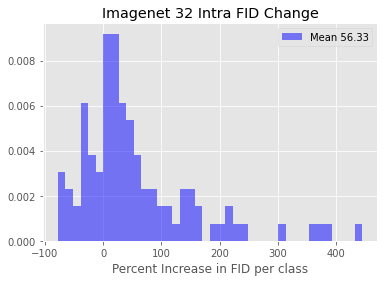

In [557]:
plt.hist(pchange, bins=40, alpha=0.5, color='b', density=True)
plt.title('Imagenet %i Intra FID Change' % res)
plt.xlabel('Percent Increase in FID per class')
plt.legend(['Mean %.2f' % pchange.mean()])
plt.savefig(save_path + 'intra.png')

In [558]:
print('Lowest IFID classes')
idxs = np.argsort(i64expt_ifid)
for i in range(10):
    print('class {} : {:.2f}'.format(idxs[i], i64expt_ifid[idxs[i]]))


Lowest IFID classes
class 3 : 16.53
class 33 : 17.39
class 9 : 21.68
class 39 : 22.21
class 31 : 25.31
class 1 : 26.19
class 4 : 27.51
class 34 : 28.45
class 2 : 30.37
class 32 : 30.76


In [560]:
print('Most improved classes')
idxs = np.argsort(adiff)
for i in range(10):
    print('class {} : {:.2f} to {:.2f}'.format(idxs[i], i64base_ifid[idxs[i]], i64expt_ifid[idxs[i]] ))
# for idx in [220]:
#     print('class {} : {:.2f} to {:.2f}'.format(idx, i64base_ifid[idx], i64expt_ifid[idx] ))

print(','.join([str(x) for x in idxs[:10]]))

Most improved classes
class 30 : 147.33 to 32.76
class 53 : 152.12 to 72.75
class 31 : 98.86 to 25.31
class 39 : 94.83 to 22.21
class 33 : 69.95 to 17.39
class 75 : 111.57 to 64.24
class 52 : 146.95 to 100.60
class 84 : 83.51 to 39.19
class 34 : 59.94 to 28.45
class 61 : 108.47 to 77.87
30,53,31,39,33,75,52,84,34,61


In [561]:
print('Most worsened classes')
idxs = np.argsort(adiff)
idxs = idxs[::-1]
for i in range(10):
    print('class {} : {:.2f} to {:.2f}'.format(idxs[i], i64base_ifid[idxs[i]], i64expt_ifid[idxs[i]] ))
print(','.join([str(x) for x in idxs[:10]]))

Most worsened classes
class 63 : 31.58 to 171.99
class 40 : 71.40 to 187.20
class 62 : 76.57 to 190.11
class 97 : 75.18 to 185.77
class 70 : 89.08 to 194.42
class 64 : 25.88 to 125.48
class 66 : 43.92 to 143.32
class 77 : 36.92 to 128.16
class 17 : 101.73 to 190.09
class 67 : 47.85 to 135.87
63,40,62,97,70,64,66,77,17,67


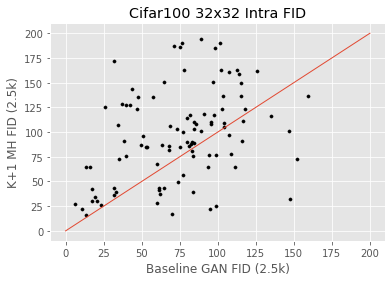

In [572]:
M = (max(i64base_ifid.max(), i64expt_ifid.max())//50 +1)*50
plt.plot([0,M], [0,M], linewidth=1)
plt.scatter(i64base_ifid, i64expt_ifid, color='black', s=10)
plt.title('Cifar100 %ix32 Intra FID' % res)
plt.xlabel('Baseline GAN FID (%s)' % iperclass)
# plt.ylabel('MHGAN FID (%s)' % iperclass)

plt.ylabel('K+1 MH FID (%s)' % iperclass)
plt.savefig(save_path + 'C100_IFID.png', dpi=600)

In [493]:
((i64base_ifid > 225).astype(int)*(i64expt_ifid < 200).astype(int)).astype(bool).sum()

0

In [494]:
mask = ((i64base_ifid > 225).astype(int)*(i64expt_ifid < 200).astype(int)).astype(bool)
(i64expt_ifid[mask].mean() - i64base_ifid[mask].mean()) / i64base_ifid[mask].mean()

/scratch0/ilya/locDoc/miniconda2/envs/venvtf2p1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  


nan

In [565]:
(pchange < 0).sum()

26

In [9]:
trial_data = []
trial_fnames = ['imagenet128_acbaseline.csv', 'imagenet128_acbaseline_trial2.csv', 'imagenet128_baseline.csv', 'imagenet128_baseline_trial2.csv', 'imagenet128_expt_trial2.csv', 'imagenet128_expt_trial3.csv']
trial_colors = []
for fname in trial_fnames:
    color = COLORD['green'] if 'acbaseline' in fname else None
    color = color or (COLORD['blue'] if 'baseline' in fname else None)
    color = color or (COLORD['red'] if 'expt' in fname else None)
    trial_colors.append(color)

    

custom_lines = [Line2D([0], [0], color=COLORD['green'], lw=8),
                Line2D([0], [0], color=COLORD['blue'], lw=8),
                Line2D([0], [0], color=COLORD['red'], lw=8)]

for fname in trial_fnames:
    trial_data.append(pd.read_csv(DATA_DIR + fname))

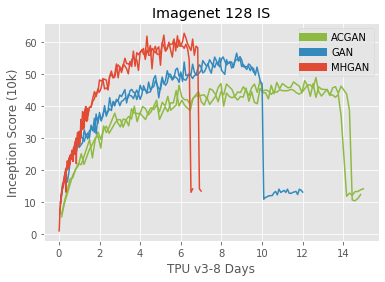

In [10]:
for i, d in enumerate(trial_data):
    #x = d['step']
    if i < 2:
        x = d['step'] * (3.3/24 / 10000)
    else:
        x = d['step'] * (2/24. / 10000)
    if 'acbaseline' in trial_fnames[i]:
        x = 2*x
    plt.plot(x, d['incscore'], '-', color=trial_colors[i])

plt.title('Imagenet 128 IS')
plt.xlabel('TPU v3-8 Days')
plt.ylabel('Inception Score (10k)')
#plt.xlim(-50000,1.25e6)
plt.legend(custom_lines, ['ACGAN', 'GAN', 'MHGAN'])
# plt.legend(trial_fnames)
plt.savefig(save_path + 'I128_IS_tpudays.png', dpi=600)

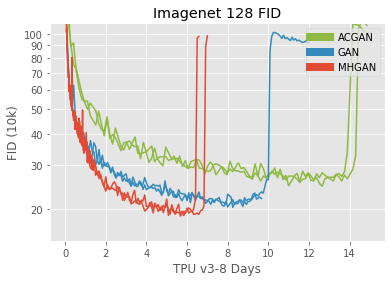

In [11]:
ymin = 100
ymax = 0
for i, d in enumerate(trial_data):
    #x = d['step']
    if i < 2:
        x = d['step'] * (3.3/24 / 10000)
    else:
        x = d['step'] * (2/24. / 10000)
    if 'acbaseline' in trial_fnames[i]:
        x = 2*x
    y = np.log2(d['fid'])
    ymin = y.min() if y.min() < ymin else ymin
    ymax = y.max() if y.max() > ymax else ymax
    plt.plot(x, y, '-', color=trial_colors[i])

y_labs = np.arange(20,110,10)
# y_labs = np.array([10,20,40,80])
y_vals = np.log2(y_labs)
plt.yticks(y_vals, labels=y_labs)
plt.ylim(np.log2(15), np.log2(110))

plt.title('Imagenet 128 FID')
#plt.xlabel('D steps')
plt.xlabel('TPU v3-8 Days')
plt.ylabel('FID (10k)')
#plt.xlim(-50000,1.25e6)
plt.legend(custom_lines, ['ACGAN', 'GAN', 'MHGAN'], loc='upper right')
plt.savefig(save_path + 'I128_FID_tpudays.png', dpi=600)

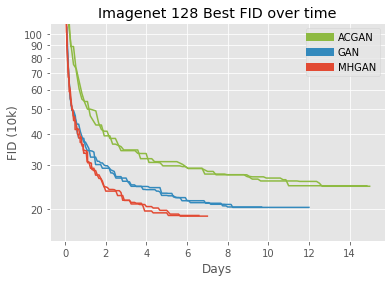

In [433]:
ymin = 100
ymax = 0

for i, d in enumerate(trial_data):
    if i < 2:
        x = d['step'] * (3.3/24 / 10000)
    else:
        x = d['step'] * (2/24. / 10000)
    if 'acbaseline' in trial_fnames[i]:
        x = 2*x
    y = np.log2(d['fid'].cummin())
    ymin = y.min() if y.min() < ymin else ymin
    ymax = y.max() if y.max() > ymax else ymax
    plt.plot(x, y, '-', color=trial_colors[i])

y_labs = np.arange(20,110,10)
# y_labs = np.array([10,20,40,80])
y_vals = np.log2(y_labs)
plt.yticks(y_vals, labels=y_labs)
plt.ylim(np.log2(15), np.log2(110))

plt.title('Imagenet 128 Best FID over time')
plt.xlabel('Days')
plt.ylabel('FID (10k)')
# plt.xlim(-50000,1.25e6)
plt.legend(custom_lines, ['ACGAN', 'GAN', 'MHGAN'], loc='upper right')
plt.savefig(save_path + 'I128_FID_days.png', dpi=600)

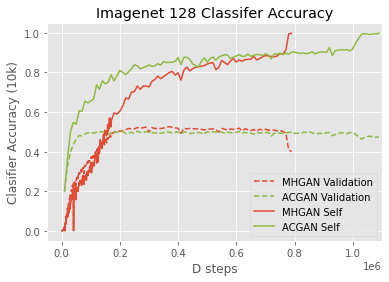

In [391]:
expt = pd.read_csv(DATA_DIR + 'imagenet128_expt_trial3.csv')
base = pd.read_csv(DATA_DIR + 'imagenet128_acbaseline_trial2.csv')

colors = [COLORD['red'], COLORD['green']]

for j, m in enumerate(['discriminator_val_acc', 'generator_self_acc']):
    for i, d in enumerate([expt, base]):
        linestyle = '--' if j == 0 else '-'
        x = 2*d['step'] if i == 1 else d['step']
        plt.plot(x, d[m], linestyle, color=colors[i])

# custom_lines = [Line2D([0], [0], color='black', lw=8),
#                 Line2D([0], [0], color=COLORD['purple'], lw=8)]
        
plt.xlim(-50000,11e5)
plt.legend(['MHGAN Validation', 'ACGAN Validation', 'MHGAN Self', 'ACGAN Self'], loc='lower right')
plt.ylabel('Clasifier Accuracy (10k)')
plt.title('Imagenet 128 Classifer Accuracy')
# plt.xticks(np.arange(0,12e5,1e5), labels=np.arange(0,12,1))
plt.xlabel('D steps')

plt.savefig(save_path + 'I128_ACCS.png', dpi=600)

In [393]:
base['discriminator_val_acc'].max(), expt['discriminator_val_acc'].max()

(0.5032, 0.5266)

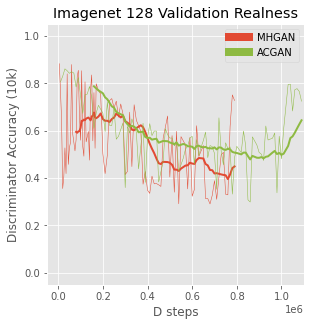

In [390]:
expt = pd.read_csv(DATA_DIR + 'imagenet128_expt_trial3.csv')
base = pd.read_csv(DATA_DIR + 'imagenet128_acbaseline_trial2.csv')

colors = [COLORD['red'], COLORD['green']]

fig = plt.figure(figsize=[4.6, 4.8])

m = 'val_real'
for i, d in enumerate([expt, base]):
    d = d[d['step'] % 5000 == 0]
    x = 2*d['step'] if i == 1 else d['step']
    plt.plot(x, d[m], '-', color=colors[i], linewidth=0.5)
    plt.plot(x, d[m].rolling(window=15).mean(), '-', color=colors[i], linewidth=2)

custom_lines = [Line2D([0], [0], color=COLORD['red'], lw=8),
                Line2D([0], [0], color=COLORD['green'], lw=8)]
        
plt.xlim(-50000,11e5)
plt.ylim(-0.05,1.05)
plt.legend(custom_lines, ['MHGAN', 'ACGAN'], loc='upper right')
plt.ylabel('Discriminator Accuracy (10k)')
plt.title('Imagenet 128 Validation Realness')
# plt.xticks(np.arange(0,12e5,1e5), labels=np.arange(0,12,1))
plt.xlabel('D steps')

plt.savefig(save_path + 'I128_DVAL.png', dpi=600)

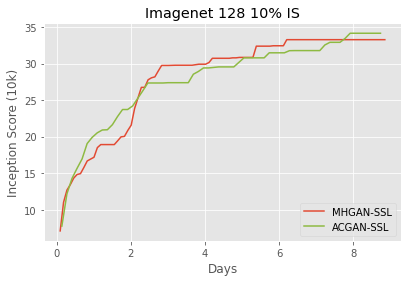

In [426]:
expt = pd.read_csv(DATA_DIR + 'ssl_imagenet128_withproj.csv')
base = pd.read_csv(DATA_DIR + 'ssl_imagenet128_withproj_baseline.csv')

colors = [COLORD['red'], COLORD['green']]

fig = plt.figure(figsize=[6.4, 4.0])
days_per_itr = [.789 / (60*60*24), 1.18 / (60*60*24)]

m = 'incscore'
for i, d in enumerate([expt, base]):
#     d = d[d['step'] % 5000 == 0]
#     x = 2*d['step'] if i == 1 else d['step']
    x = days_per_itr[i]*d['step'] 
    plt.plot(x, d[m].cummax(), '-', color=colors[i])

# custom_lines = [Line2D([0], [0], color='black', lw=8),
#                 Line2D([0], [0], color=COLORD['purple'], lw=8)]
        
# plt.xlim(-50000,11e5)
# plt.ylim(-0.05,1.05)
plt.legend(['MHGAN-SSL','ACGAN-SSL'], loc='lower right')
plt.ylabel('Inception Score (10k)')
plt.title('Imagenet 128 10% IS')
# plt.xticks(np.arange(0,12e5,1e5), labels=np.arange(0,12,1))
plt.xlabel('Days')

plt.savefig(save_path + 'I128_SSL_IS.png', dpi=600)

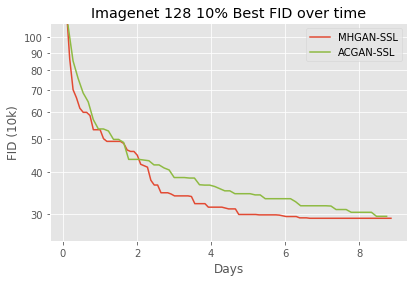

In [434]:
expt = pd.read_csv(DATA_DIR + 'ssl_imagenet128_withproj.csv')
base = pd.read_csv(DATA_DIR + 'ssl_imagenet128_withproj_baseline.csv')

colors = [COLORD['red'], COLORD['green']]

fig = plt.figure(figsize=[6.4, 4.0])
days_per_itr = [.789 / (60*60*24), 1.18 / (60*60*24)]

m = 'fid'
for i, d in enumerate([expt, base]):
#     d = d[d['step'] % 5000 == 0]
#     x = 2*d['step'] if i == 1 else d['step']
    x = days_per_itr[i]*d['step'] 
    plt.plot(x, np.log2(d[m].cummin()), '-', color=colors[i])


y_labs = np.arange(20,110,10)
y_vals = np.log2(y_labs)
plt.yticks(y_vals, labels=y_labs)
plt.ylim(np.log2(25), np.log2(110))

# plt.xlim(-50000,11e5)
# plt.ylim(-0.05,1.05)
plt.legend(['MHGAN-SSL','ACGAN-SSL'], loc='upper right')
plt.ylabel('FID (10k)')
plt.title('Imagenet 128 10% Best FID over time')
# plt.xticks(np.arange(0,12e5,1e5), labels=np.arange(0,12,1))
plt.xlabel('Days')

plt.savefig(save_path + 'I128_SSL_FID_days.png', dpi=600)

In [527]:
trial_fnames = ['imagenet64_fixed', 'imagenet64_baseline', 'I64_ac2step_is_fid', 'I64_ac5step_is_fid']
hour_conversion = [1/10000.*29/60, 1/10000.*29/60, 1/10000.*40/60, 1/10000.*73/60]
trial_data = [pd.read_csv(DATA_DIR + fname + '.csv') for fname in trial_fnames]
trial_colors = ['red', 'blue', 'green', 'purple']
trial_colors = [COLORD[c] for c in trial_colors]
custom_lines = [Line2D([0], [0], color=c, lw=8) for c in trial_colors]

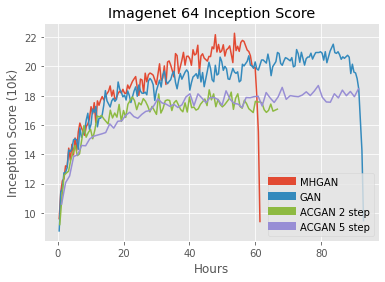

In [534]:
for i, d in enumerate(trial_data):
    x = d['step'] * hour_conversion[i]
    plt.plot(x, d['incscore'], '-', color=trial_colors[i])

plt.legend(custom_lines, ['MHGAN', 'GAN', 'ACGAN 2 step', 'ACGAN 5 step'])
plt.title('Imagenet 64 Inception Score')

plt.ylabel('Inception Score (10k)')
plt.xlabel('Hours')
plt.savefig(save_path + 'I64_IS.png', dpi=600)

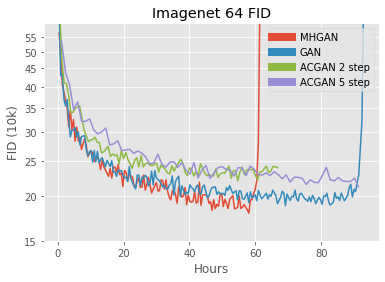

In [535]:
for i, d in enumerate(trial_data):
    x = d['step'] * hour_conversion[i]
    plt.plot(x, np.log2(d['fid']), '-', color=trial_colors[i])

y_labs = np.arange(15,60,5)
y_vals = np.log2(y_labs)
plt.yticks(y_vals, labels=y_labs)
plt.ylim(np.log2(15), np.log2(60))
    
plt.legend(custom_lines, ['MHGAN', 'GAN', 'ACGAN 2 step', 'ACGAN 5 step'])
plt.title('Imagenet 64 FID')

plt.ylabel('FID (10k)')
plt.xlabel('Hours')
plt.savefig(save_path + 'I64_FID.png', dpi=600)

In [590]:
# CIFAR100
# trial_fnames = ['c100_expt', 'c100_baseline', 'c100_acbaseline', 'c100_kp1']
trial_fnames = ['c100_acbaseline_2step', 'c100_baseline', 'c100_acbaseline', 'c100_kp1_moresave']
trial_data = [pd.read_csv(DATA_DIR + fname + '.csv') for fname in trial_fnames]
trial_colors = ['green', 'blue', 'pink', 'yellow']
trial_colors = [COLORD[c] for c in trial_colors]
custom_lines = [Line2D([0], [0], color=c, lw=8) for c in trial_colors]

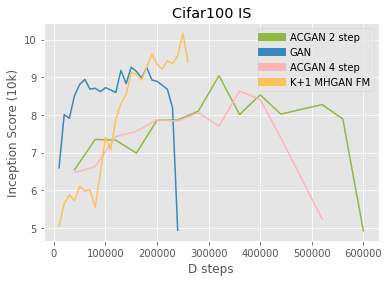

In [591]:
for i, d in enumerate(trial_data):
    x = d['step']
    if 'acbaseline' in trial_fnames[i] or 'kp1' in trial_fnames[i]:
        x = 4*x
    plt.plot(x, d['incscore'], '-', color=trial_colors[i])

plt.title('Cifar100 IS')
plt.xlabel('D steps')
plt.ylabel('Inception Score (10k)')
plt.legend(custom_lines, ['ACGAN 2 step', 'GAN', 'ACGAN 4 step', 'K+1 MHGAN FM'])

plt.savefig(save_path + 'C100_IS.png', dpi=600)

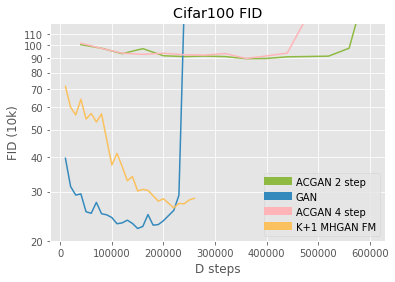

In [592]:
for i, d in enumerate(trial_data):
    x = d['step']
    if 'acbaseline' in trial_fnames[i] or 'kp1' in trial_fnames[i]:
        x = 4*x
    plt.plot(x, np.log2(d['fid']), '-', color=trial_colors[i])


y_labs = np.arange(20,120,10)
y_vals = np.log2(y_labs)
plt.yticks(y_vals, labels=y_labs)
plt.ylim(np.log2(20), np.log2(120))
    
plt.title('Cifar100 FID')
plt.xlabel('D steps')
plt.ylabel('FID (10k)')
# plt.xlim(-50000,1.25e6)
plt.legend(custom_lines, ['ACGAN 2 step', 'GAN', 'ACGAN 4 step', 'K+1 MHGAN FM'])
# plt.legend(trial_fnames)
plt.savefig(save_path + 'C100_FID.png', dpi=600)

In [13]:
best_data = pd.read_csv(DATA_DIR + 'gan_best.tsv', sep="\t", header=None, names=["name", "fid","is","tpu_days"])

In [14]:
DATA_DIR

'/scratch0/ilya/locDownloads/temp/wacv_mh_data/'

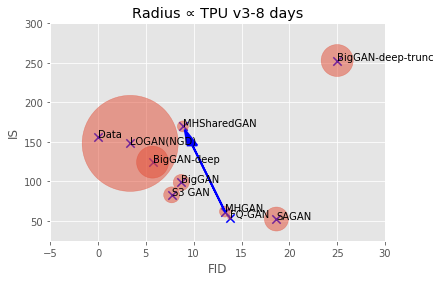

In [15]:
plt.scatter(best_data['fid'], best_data['is'], s=70, marker='x', color='blue')
plt.scatter(0.0, 156.4, s=70, marker='x', color='blue')
plt.annotate('Data', (0.0, 156.4))
plt.scatter(best_data['fid'], best_data['is'], s=best_data['tpu_days']**2, alpha=0.5)
for i, txt in enumerate(best_data["name"]):
    plt.annotate(txt, (best_data['fid'].iat[i], best_data['is'].iat[i]))
plt.xlim(-5,30)
plt.ylim(25,300)
start_pt = best_data[best_data['name']== 'MHGAN']
x = start_pt['fid'].values[0]
y = start_pt['is'].values[0]
end_pt = best_data[best_data['name']== 'MHSharedGAN']
x2 = end_pt['fid'].values[0]
y2 = end_pt['is'].values[0]

plt.arrow(x, y, x2-x+1, y2-y-24, color='b', head_width=1, head_length=20, linewidth=2)
plt.xlabel('FID')
plt.ylabel('IS')
plt.title('Radius ∝ TPU v3-8 days')

plt.savefig(save_path + 'gan_all_stars.png', dpi=600)

In [72]:
save_path

'/scratch0/ilya/locDownloads/wacv2020_fig/'

In [37]:
end_pt['fid'].values[0]

8.87